# **VADER**

In [ ]:
!pip install pandas vaderSentiment scikit-learn

# **MAQUINA DE SOPORTE VECTORIAL**

In [ ]:
import pandas as pd
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer

# Se cargan los datos csv
datos_fb = pd.read_csv("/content/facebook-posts-by-profile.csv")
datos_x = pd.read_csv("/content/Twitter- datasets.csv")
datos_ins = pd.read_csv("/content/Instagram-datasets.csv")

# Aquí se toman solo las columnas que contengan los textos/publicaciones
colum_face = datos_fb['content'].astype(str)
colum_x = datos_x['description'].astype(str)
colum_ins = datos_ins['comment'].astype(str)

In [ ]:
import re

def preprocess(text):
    text = text.lower()  # Minúsculas
    text = re.sub(r'http\S+|www.\S+', '', text)  # Quitar URLs
    text = re.sub(r'[^a-zA-Záéíóúñü ]', '', text)  # Quitar caracteres especiales
    text = re.sub(r'\s+', ' ', text).strip()  # Quitar espacios múltiples
    return text

# Se aplica el procesamiento del texto de las publicaciones
colum_face = colum_face.apply(preprocess)
colum_x = colum_x.apply(preprocess)
colum_ins = colum_ins.apply(preprocess)

In [ ]:
analyzer = SentimentIntensityAnalyzer()

def analyze_sentiment(text):
    scores = analyzer.polarity_scores(text)
    if scores['compound'] >= 0.05:
        return 'positivo'
    elif scores['compound'] <= -0.05:
        return 'negativo'
    else:
        return 'neutral'

# Analizar cada dataset
datos_fb['sentiment'] = colum_face.apply(analyze_sentiment)
datos_x['sentiment'] = colum_x.apply(analyze_sentiment)
datos_ins['sentiment'] = colum_ins.apply(analyze_sentiment)

In [ ]:
# Conteo de sentimientos por plataforma
print("Conteo de sentimientos por plataforma:")

def count_sentiments(df, platform):
    print(f"\n{platform}:")
    print(df['sentiment'].value_counts())

# Mostrar el conteo
count_sentiments(datos_fb, "Facebook")
count_sentiments(datos_x, "X")
count_sentiments(datos_ins, "Instagram")

Conteo de sentimientos por plataforma:

Facebook:
sentiment
positivo    474
neutral     377
negativo    149
Name: count, dtype: int64

X:
sentiment
neutral     548
positivo    282
negativo    170
Name: count, dtype: int64

Instagram:
sentiment
neutral     609
positivo    338
negativo     53
Name: count, dtype: int64


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import accuracy_score, classification_report

In [ ]:
# Combinar los datasets para entrenar un modelo
combined_df = pd.concat([datos_fb, datos_x, datos_ins])
X = combined_df['content'].astype(str)
y = combined_df['sentiment']

In [ ]:
# Vectorizar el texto
vectorizer = TfidfVectorizer(max_features=5000)
X_vectorized = vectorizer.fit_transform(X)

In [ ]:
# Dividir en conjunto de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X_vectorized, y, test_size=0.2, random_state=42)

In [ ]:
svm_model = SVC(kernel='linear', C=1.0, random_state=42)  # Kernel lineal, puedes probar con 'rbf' o 'poly'
svm_model.fit(X_train, y_train)

SVC(kernel='linear', random_state=42)

In [ ]:
# Predecir con SVM
y_pred_svm = svm_model.predict(X_test)

In [ ]:
# Evaluación del modelo SVM
print("\n✅ Métricas del Modelo SVM:")
print("Accuracy:", accuracy_score(y_test, y_pred_svm))
print(classification_report(y_test, y_pred_svm))


✅ Métricas del Modelo SVM:
Accuracy: 0.6033333333333334
              precision    recall  f1-score   support

    negativo       0.83      0.12      0.21        83
     neutral       0.60      0.89      0.72       311
    positivo       0.59      0.36      0.45       206

    accuracy                           0.60       600
   macro avg       0.68      0.46      0.46       600
weighted avg       0.63      0.60      0.55       600



In [ ]:
#from sklearn.utils.multiclass import unique_labels

#labels = sorted(unique_labels(y_test, y_pred_svm))
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt
import seaborn as sns

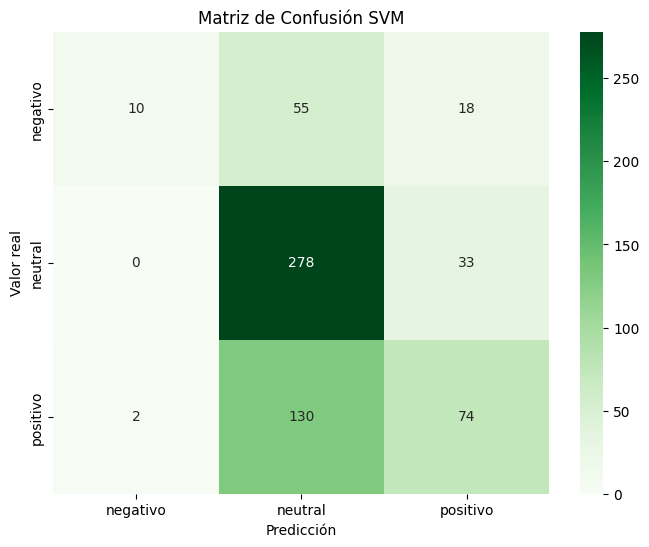

In [ ]:
# Matriz de confusión para SVM
cm_svm = confusion_matrix(y_test, y_pred_svm, labels=labels)

# Visualización
plt.figure(figsize=(8, 6))
sns.heatmap(cm_svm, annot=True, fmt='d', cmap='Greens',
            xticklabels=labels, yticklabels=labels)
plt.title('Matriz de Confusión SVM')
plt.xlabel('Predicción')
plt.ylabel('Valor real')
plt.show()

Facebook


In [ ]:
import pandas as pd
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer

# Se carga el conjunto de datos para Facebook
datos_fb = pd.read_csv("/content/facebook-posts-by-profile.csv")


# Aquí se toman solo las columnas que contengan los textos/publicaciones
colum_face = datos_fb['content'].astype(str)

In [ ]:
import re

def preprocess(text):
    text = text.lower()  # Minúsculas
    text = re.sub(r'http\S+|www.\S+', '', text)  # Quitar URLs
    text = re.sub(r'[^a-zA-Záéíóúñü ]', '', text)  # Quitar caracteres especiales
    text = re.sub(r'\s+', ' ', text).strip()  # Quitar espacios múltiples
    return text

# Se aplica el procesamiento del texto de las publicaciones
colum_face = colum_face.apply(preprocess)

In [ ]:
analyzer = SentimentIntensityAnalyzer()

def analyze_sentiment(text):
    scores = analyzer.polarity_scores(text)
    if scores['compound'] >= 0.05:
        return 'positivo'
    elif scores['compound'] <= -0.05:
        return 'negativo'
    else:
        return 'neutral'

# Analizar el conjunto de datos de Facebook
datos_fb['sentiment'] = colum_face.apply(analyze_sentiment)

In [ ]:
# Conteo de sentimientos para la plataforma Facebook
print("Conteo de sentimientos por plataforma:")

def count_sentiments(df, platform):
    print(f"\n{platform}:")
    print(df['sentiment'].value_counts())

# Mostrar el conteo
count_sentiments(datos_fb, "Facebook")

Conteo de sentimientos por plataforma:

Facebook:
sentiment
positivo    474
neutral     377
negativo    149
Name: count, dtype: int64


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import accuracy_score, classification_report

In [ ]:
#Solo conjunto de datos Facebook
X = datos_fb['content'].astype(str)
y = datos_fb['sentiment']

In [ ]:
# Vectorizar el texto
vectorizer = TfidfVectorizer(max_features=5000)
X_vectorized = vectorizer.fit_transform(X)

In [ ]:
# Dividir en conjunto de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X_vectorized, y, test_size=0.2, random_state=42)

In [ ]:
# Entrenar modelo
svm_model = SVC(kernel='linear', C=1.0, random_state=42)  # Kernel lineal, puedes probar con 'rbf' o 'poly'
svm_model.fit(X_train, y_train)

SVC(kernel='linear', random_state=42)

In [ ]:
# Predecir con SVM
y_pred_svm = svm_model.predict(X_test)

In [ ]:
# Evaluación del modelo SVM
print("Métricas del Modelo SVM:")
print("Accuracy:", accuracy_score(y_test, y_pred_svm))
print(classification_report(y_test, y_pred_svm))

Métricas del Modelo SVM:
Accuracy: 0.61
              precision    recall  f1-score   support

    negativo       0.73      0.26      0.38        31
     neutral       0.59      0.59      0.59        74
    positivo       0.61      0.74      0.67        95

    accuracy                           0.61       200
   macro avg       0.64      0.53      0.55       200
weighted avg       0.62      0.61      0.60       200



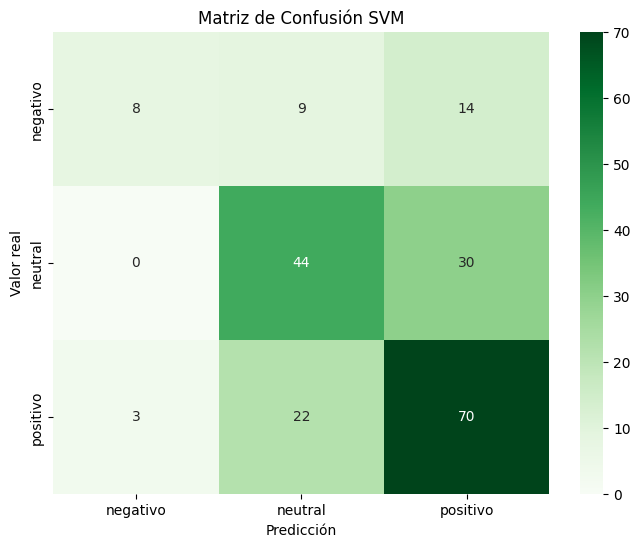

In [ ]:
# Matriz de confusión para SVM
cm_svm = confusion_matrix(y_test, y_pred_svm, labels=labels)

# Visualización
plt.figure(figsize=(8, 6))
sns.heatmap(cm_svm, annot=True, fmt='d', cmap='Greens',
            xticklabels=labels, yticklabels=labels)
plt.title('Matriz de Confusión SVM')
plt.xlabel('Predicción')
plt.ylabel('Valor real')
plt.show()

X

In [ ]:
import pandas as pd
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer

# Se carga el conjunto de datos para X
datos_x = pd.read_csv("/content/Twitter- datasets.csv")


# Aquí se toman solo las columnas que contengan los textos/publicaciones
colum_x = datos_x['description'].astype(str)

In [ ]:
import re

def preprocess(text):
    text = text.lower()  # Minúsculas
    text = re.sub(r'http\S+|www.\S+', '', text)  # Quitar URLs
    text = re.sub(r'[^a-zA-Záéíóúñü ]', '', text)  # Quitar caracteres especiales
    text = re.sub(r'\s+', ' ', text).strip()  # Quitar espacios múltiples
    return text

# Se aplica el procesamiento del texto de las publicaciones
colum_x = colum_x.apply(preprocess)

In [ ]:
analyzer = SentimentIntensityAnalyzer()

def analyze_sentiment(text):
    scores = analyzer.polarity_scores(text)
    if scores['compound'] >= 0.05:
        return 'positivo'
    elif scores['compound'] <= -0.05:
        return 'negativo'
    else:
        return 'neutral'

# Analizar el conjunto de datos de X
datos_x['sentiment'] = colum_x.apply(analyze_sentiment)

In [ ]:
# Conteo de sentimientos para la plataforma X
print("Conteo de sentimientos por plataforma:")

def count_sentiments(df, platform):
    print(f"\n{platform}:")
    print(df['sentiment'].value_counts())

# Mostrar el conteo
count_sentiments(datos_x, "X")

Conteo de sentimientos por plataforma:

X:
sentiment
neutral     548
positivo    282
negativo    170
Name: count, dtype: int64


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import accuracy_score, classification_report

In [ ]:
#Solo conjunto de datos X
X = datos_x['description'].astype(str)
y = datos_x['sentiment']

In [ ]:
# Vectorizar el texto
vectorizer = TfidfVectorizer(max_features=5000)
X_vectorized = vectorizer.fit_transform(X)

In [ ]:
# Dividir en conjunto de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X_vectorized, y, test_size=0.2, random_state=42)

In [ ]:
# Entrenar modelo
svm_model = SVC(kernel='linear', C=1.0, random_state=42)  # Kernel lineal, puedes probar con 'rbf' o 'poly'
svm_model.fit(X_train, y_train)

SVC(kernel='linear', random_state=42)

In [ ]:
# Predecir con SVM
y_pred_svm = svm_model.predict(X_test)

In [ ]:
# Evaluación del modelo SVM
print("Métricas del Modelo SVM:")
print("Accuracy:", accuracy_score(y_test, y_pred_svm))
print(classification_report(y_test, y_pred_svm))

Métricas del Modelo SVM:
Accuracy: 0.67
              precision    recall  f1-score   support

    negativo       0.50      0.07      0.12        29
     neutral       0.69      0.93      0.79       108
    positivo       0.63      0.51      0.56        63

    accuracy                           0.67       200
   macro avg       0.61      0.50      0.49       200
weighted avg       0.64      0.67      0.62       200



In [ ]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt
import seaborn as sns

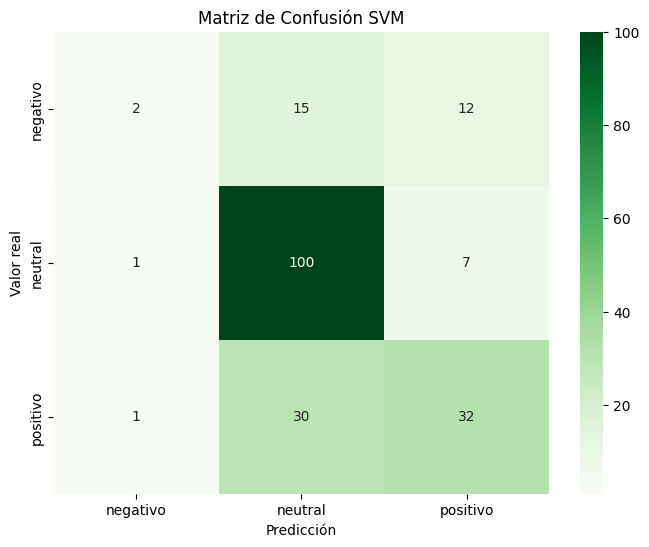

In [ ]:
# Matriz de confusión para SVM
cm_svm = confusion_matrix(y_test, y_pred_svm, labels=labels)

# Visualización
plt.figure(figsize=(8, 6))
sns.heatmap(cm_svm, annot=True, fmt='d', cmap='Greens',
            xticklabels=labels, yticklabels=labels)
plt.title('Matriz de Confusión SVM')
plt.xlabel('Predicción')
plt.ylabel('Valor real')
plt.show()

INSTAGRAM


In [ ]:
import pandas as pd
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer

# Se carga el conjunto de datos para Instagram
datos_ins = pd.read_csv("/content/Instagram-datasets.csv")


# Aquí se toman solo las columnas que contengan los textos/publicaciones
colum_ins = datos_ins['comment'].astype(str)

In [ ]:
import re

def preprocess(text):
    text = text.lower()  # Minúsculas
    text = re.sub(r'http\S+|www.\S+', '', text)  # Quitar URLs
    text = re.sub(r'[^a-zA-Záéíóúñü ]', '', text)  # Quitar caracteres especiales
    text = re.sub(r'\s+', ' ', text).strip()  # Quitar espacios múltiples
    return text

# Se aplica el procesamiento del texto de las publicaciones
colum_ins = colum_ins.apply(preprocess)

In [ ]:
analyzer = SentimentIntensityAnalyzer()

def analyze_sentiment(text):
    scores = analyzer.polarity_scores(text)
    if scores['compound'] >= 0.05:
        return 'positivo'
    elif scores['compound'] <= -0.05:
        return 'negativo'
    else:
        return 'neutral'

# Analizar el conjunto de datos de instagram
datos_ins['sentiment'] = colum_ins.apply(analyze_sentiment)

In [ ]:
# Conteo de sentimientos para la plataforma instagram
print("Conteo de sentimientos para la plataforma de Instagram:")

def count_sentiments(df, platform):
    print(f"\n{platform}:")
    print(df['sentiment'].value_counts())

# Mostrar el conteo
count_sentiments(datos_ins, "Instagram")

Conteo de sentimientos para la plataforma de Instagram:

Instagram:
sentiment
neutral     609
positivo    338
negativo     53
Name: count, dtype: int64


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import accuracy_score, classification_report

In [ ]:
#Solo conjunto de datos de instagram
X = datos_ins['comment'].astype(str)
y = datos_ins['sentiment']

In [ ]:
# Vectorizar el texto
vectorizer = TfidfVectorizer(max_features=5000)
X_vectorized = vectorizer.fit_transform(X)

In [ ]:
# Dividir en conjunto de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X_vectorized, y, test_size=0.2, random_state=42)

In [ ]:
# Entrenar modelo
svm_model = SVC(kernel='linear', C=1.0, random_state=42)  # Kernel lineal, puedes probar con 'rbf' o 'poly'
svm_model.fit(X_train, y_train)

SVC(kernel='linear', random_state=42)

In [ ]:
# Predecir con SVM
y_pred_svm = svm_model.predict(X_test)

In [ ]:
# Evaluación del modelo SVM
print("Métricas del Modelo SVM:")
print("Accuracy:", accuracy_score(y_test, y_pred_svm))
print(classification_report(y_test, y_pred_svm))

Métricas del Modelo SVM:
Accuracy: 0.84
              precision    recall  f1-score   support

    negativo       1.00      0.20      0.33        10
     neutral       0.82      0.95      0.88       117
    positivo       0.87      0.75      0.81        73

    accuracy                           0.84       200
   macro avg       0.90      0.63      0.67       200
weighted avg       0.85      0.84      0.83       200



In [ ]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt
import seaborn as sns

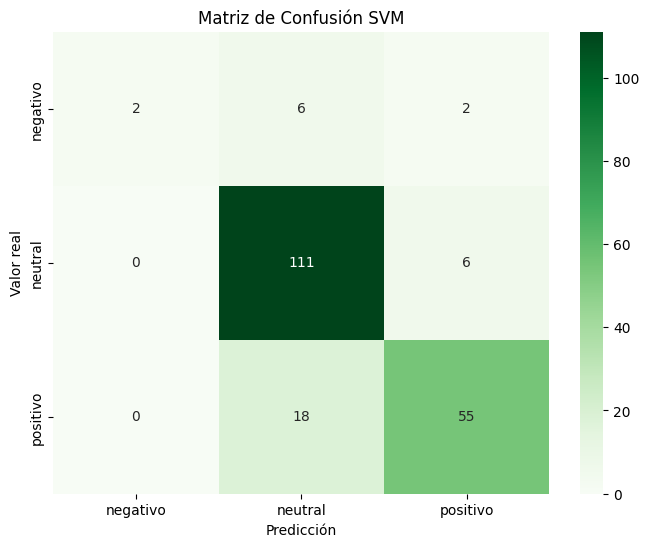

In [ ]:
# Matriz de confusión para SVM
cm_svm = confusion_matrix(y_test, y_pred_svm, labels=labels)

# Visualización
plt.figure(figsize=(8, 6))
sns.heatmap(cm_svm, annot=True, fmt='d', cmap='Greens',
            xticklabels=labels, yticklabels=labels)
plt.title('Matriz de Confusión SVM')
plt.xlabel('Predicción')
plt.ylabel('Valor real')
plt.show()